In [34]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [35]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 11, 1)

prices = web.DataReader('BTC-USD', 'yahoo', start, end)['Close']
returns = prices.pct_change()

In [36]:
last_price = prices[-1]
last_price

63226.40234375

In [37]:
# number of simulations
number_simulations = 1000
number_days = 1400

simulation_df = pd.DataFrame()

In [38]:
for x in range(number_simulations):
    count = 0
    daily_volatility= returns.std()
    
    price_series = []
    
    for y in range(number_days):
        if count == 1400:
            break
            price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
            price_series.append(price)
            count += 1
            
        simulation_df[x]= price_series
        
simulation_df.tail()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999


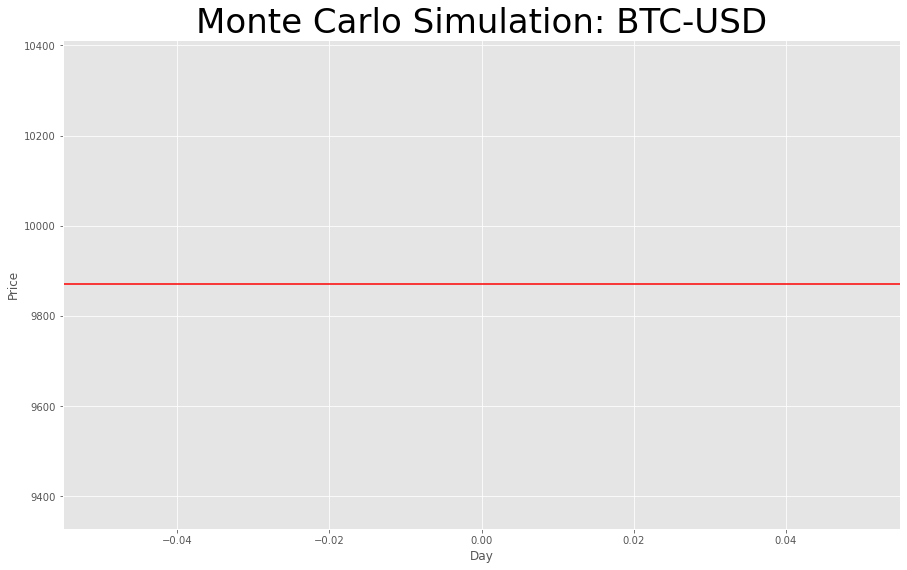

In [19]:
fig = plt.figure(figsize= (15,9))
plt.plot(simulation_df)
plt.axhline(y = last_price, color= "red", linestyle= '-')
plt.title('Monte Carlo Simulation: BTC-USD', fontsize= 34)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()